## K-Nearest Neighbour (KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

Kullanacağımız veri seti, bir tümörün iyi huylu mu, kötü huylu mu olduğunu göstermektedir.

diagnosis sütununda yer alan M değerleri kötü huylu tümörü, B değerleri de iyi huylu tümörü ifade etmektedir.

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Kullanmayacağımız feature'leri veri setinden kaldıralım.

In [4]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [5]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


İyi huylu ve kötü huylu tümörleri ayıralım.

In [6]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

In [7]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

diagnosis sütununa baktığımızda 357 tane iyi huylu tümör olduğunu görüyoruz.

Şimdi görselleştirme yapalım.

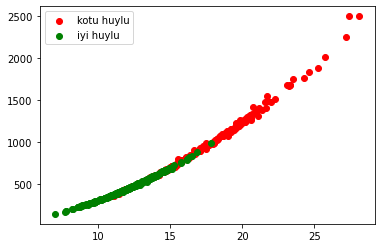

In [8]:
#scatter plot
plt.scatter(M.radius_mean,M.area_mean,color="red",label="kotu huylu")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="iyi huylu")
plt.legend() #label'ların görünmesini sağlar.
plt.show()

iyi huylu ve kötü huylu ayrımını kolaylıkla yapabileceğimizi görselde görüyoruz. Yeşil ve kırmızı renklerini birbirinden kolaylıkla ayırabilmemiz mümkün olduğundan radius_mean ve area_mean feature'lerini kullanarak sınıflandırma işlemini yapabilmemiz mümkündür.

radiues_mean ve texture_mean feature'lerini kullanarak görselleştirme yapalım.

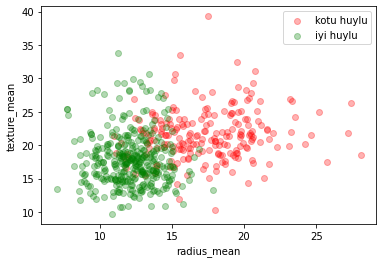

In [9]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu huylu",alpha=0.3) #alpha parametresi ile saydamlık sağlanır.
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi huylu",alpha=0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

KNN = K Nearest Neighbour = K En Yakın Komşu

Knn algoritmasının adımları şu şekildedir:
    
    1. K değeri seçilir.
    
    2. K tane en yakın veri noktaları bulunur.
    
    3. K en yakın komşu arasında hangi class'tan kaç tane olduğu hesaplanır.
    
    4. Test edilen verinin hangi class'a ait olduğu tespit edilir.

<img src="knn.png" style="width:600px;height:500px"/>

Görselde gördüğünüz siyah nokta, iyi huylu mu kötü huylu mu olduğunun tespit edilmesi istenen bir veridir. Bu nokta kötü huylu tümör verilerine (kırmızı noktalar) daha yakın olduğu için bu verinin de kötü huylu olduğu söylenebilir.

Mesela k=3 olsun. Siyah noktaya en yakın 3 nokta tespit edilir. En yakın 3 noktanın hepsi kırmızı renktedir. Bu durumda 3 tane kötü huylu, 0 tane iyi huylu noktaya yakınlığı söz konusudur. Dolayısıyla kötü huylu class'ına ait noktalar, siyah noktaya daha yakın olduğu için bu veri noktası da kötü huylu sınıfına aittir.

<img src="knn2.png" style="width:600px;height:500px"/>

k=4 değeri için siyah veri noktasının hangi sınıfa ait olduğunu tespit edelim. Siyah noktaya en yakın noktaların 3 tanesi iyi, 1 tanesi kötü huylu sınıfına aittir. Siyah noktaya yakın olan noktaların çoğu iyi huylu sınıfına ait olduğu için siyah nokta da iyi huylu sınıfına aittir.

Biz göz kararı hangi noktanın yakın olduğunu tespit edebiliyoruz ama algoritma bu yakınlığı öklid mesafesine göre hesaplıyor.

<font color="LawnGreen"><BR>
ÖKLİD MESAFESİ (EUCLIDEAN DISTANCE):

<img src="oklidd.png" style="width:500px;height:400px"/>

Yukarıdaki görselde bulunan formül ile siyah noktalar arasındaki öklid mesafesini buluruz.

KNN algoritmasında en önemli husus normalize yapmaktır. Sebebi ise, mesela perimeter_mean feature'sinin ilk satırındaki değer 142 ve compactness_mean feature'sinin ilk satırındaki değer 0.11 'dir. Bu iki nokta arasındaki öklid mesafesi:

    y1=0.11 , y2=0.12 , x1=142 , x2=145

   √ (145-142)^2 + (0.12-0.11)^2  = 3

<img src="oklid3.png" style="width:400px;height:300px"/>

Dolayısıyla şekilde de görebildiğimiz üzere, y1 ve y2 'yi hiç hesaba katmasak ve direk x1 ile x2 arasındaki farkı alsak (turuncu nokta) aynı sonucu elde edecektik. Dolayısıyla x1 ve x2 feature'si yani perimeter_mean feature'si, compactness_mean feature'sini domine etti, ortadan kaldırdı. Dolayısıyla feature'leri normalize ederek tüm değerleri 0 ile 1 arasına taşırız. Böylece euclidean distance hesabı yaparken perimeter_mean feature'si, compactness_mean feature'sini domine etmez.

Şimdi KNN algoritmasını koda dökelim.

In [10]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 
#diagnosis sütunu string olduğundan, sınıflandırma işleminin gerçekleştirilebilmesi için int tipine çevirdim.
#1 değerleri kötü huylu tümörü, 0 değerleri iyi huylu tümörü ifade eder.

y = data.diagnosis.values

x_data = data.drop(["diagnosis"],axis=1)

In [11]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [12]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors = k

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

In [14]:
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

Bir üst blokta tahmin edilen değerlere ait çıktıyı görüyorsunuz. Bu tahminlerin kaç tanesinin doğru tahmin olduğuna bakalım.

In [15]:
print("k = {} iken knn score : {}".format(3,knn.score(x_test,y_test)))

k = 3 iken knn score : 0.9532163742690059


k değeri hyperparameter'dir. Yani en uygun k değeri farklı değerin denenmesi sonucunda bulunabilir. 

Farklı k değerleri için algoritmayı çalıştırarak k'nın en uygun değerini bulalım.

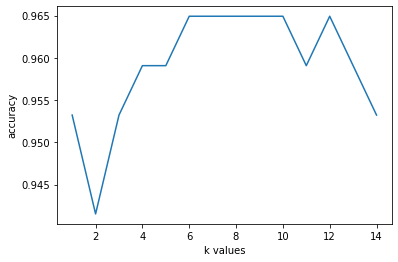

In [19]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)  
#x ekseni 1'den 15'e kadar olan değerlerdir. y ekseni k'nın bu değerleri için algoritmanın doğruluk değeridir.
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

Yukarıda k'ya 1 ile 15 arasındaki değerler verilmiştir. 

Çıktıyı inceleyelim. k=1 iken doğruluk değeri 0.955'ten biraz düşüktür. Maksimum doğruluk değeri k=6, k=7, k=8, k=9 iken elde edilmiştir.